## `NETWORK INTRUSION`

AIM is to build binary network intrusion detection system to detect anamolies and attacks in the network.

### `ENVIRONMENT SETUP`

In [1]:
import datetime
script_start_time = datetime.datetime.now()

In [2]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 150)

In [3]:
train = pd.read_csv('Train.csv', header= None)
test = pd.read_csv('Test.csv', header= None)

In [4]:
columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent","hot",
 "num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations", 
 "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login","count","srv_count","serror_rate", 
 "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate","srv_diff_host_rate","dst_host_count",
 "dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", 
 "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", "dst_host_rerror_rate",
 "dst_host_srv_rerror_rate","attack", "last_flag"]

In [5]:
train.columns = columns
test.columns = columns

### `CHECKING DATA STRUCUTRE`

In [6]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [7]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [8]:
train.shape

(125973, 43)

In [9]:
test.shape

(22544, 43)

In [10]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [11]:
test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.0,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,0.002440,0.000266,0.114665,0.008738,0.001153,0.003549,0.0,0.000488,0.028433,79.028345,31.124379,0.102924,0.103635,0.238463,0.235179,0.740345,0.094074,0.098110,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,18.017965
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,0.049334,0.021060,8.041614,0.676842,0.048014,0.067829,0.0,0.022084,0.166211,128.539248,89.062532,0.295367,0.298332,0.416118,0.416215,0.412496,0.259138,0.253545,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,4.270361
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,8.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,123.250000,16.000000,0.000000,0.000000,0.250000,0.072500,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,2.000000,878.000000,100.000000,5.000000,4.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [12]:
# Dropping duplicates if any
test.drop_duplicates(inplace=True)
train.drop_duplicates(inplace=True)

# field has all 0 values. Hence, it will be removed from both train and test dataset since it is a redundant field.
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

### `MAGICAL VALUES IN NUMERIC FEATURES`

In [13]:
# Magical values in train
mask_magic = train.select_dtypes(['float64', 'int64']).columns.values

misc = pd.DataFrame(columns=['feature', 'neg'])

i = 0

for x in mask_magic:
    a = (train[x] < 0).sum()
    misc.loc[i] = [x, a]
    i += 1

misc[misc.neg > 0]

,feature,neg


### `MISSING VALUES`

In [14]:
# Missing values in test
for x in train.columns:
    if train[x].isnull().sum() > 0:
        print(f'Feature Name: {x}   \t%Missing: {np.round((train[x].isnull().sum()/ len(train.index))*100,2)}')

### `NEW FEATURES`

In [15]:
# Creating attack feature
train['attack_flag'] = train.attack.apply(lambda x: 0 if x == 'normal' else 1)

# Creating boolean attack feature
test['attack_flag'] = test.attack.apply(lambda x: 0 if x == 'normal' else 1)

# Making boolean feature
train['attack_flag'] = train.attack_flag.astype('uint64')
test['attack_flag'] = test.attack_flag.astype('uint64')

In [16]:
# Creating Attack Class
def attack_class(attack_type = ''):
    attack_class = ''
    
    if attack_type in ['back', 'land','neptune', 'pod', 'smurf', 'teardrop', 'apache2', 'udpstorm', 'processtable', 'worm']:
        attack_class = 'dos'
        
    elif attack_type in ['satan', 'ipsweep', 'nmap', 'portsweep', 'mscan', 'saint']:
        attack_class = 'probe'
        
    elif attack_type in ['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezmaster', 'warezclient', 'spy', 
                         'xlock', 'xsnoop', 'snmpgetattack', 'snmpguess', 'httptunnel', 'sendmail', 'named']:
        attack_class = 'r2l'
        
    elif attack_type in ['buffer_overflow', 'loadmodule', 'rootkit', 'perl', 'sqlattack', 'xterm', 'ps']:
        attack_class = 'u2r'
        
    else:
        attack_class = 'normal'
        
    return attack_class

# Train dataset
train['attack_class'] = train.attack.apply(attack_class)

# Test dataset
test['attack_class'] = test.attack.apply(attack_class)

# Drop attack features
train.drop('attack', axis=1, inplace=True)
test.drop('attack', axis=1, inplace=True)

### `ENCODING`

In [17]:
from sklearn.preprocessing import LabelEncoder

# label encoder for protocol_type
protocol_en = LabelEncoder()
protocol_en.fit(train.protocol_type.unique())
train['protocol_type'] = protocol_en.transform(train.protocol_type)
test['protocol_type'] = protocol_en.transform(test.protocol_type)

# label encoder for service
service_en = LabelEncoder()
service_en.fit(train.service.unique())
train['service'] = service_en.transform(train.service)
test['service'] = service_en.transform(test.service)

# label encoder for flag
flag_en = LabelEncoder()
flag_en.fit(train.flag.unique())
train['flag'] = flag_en.transform(train.flag)
test['flag'] = flag_en.transform(test.flag)

# label encoder for attack_class
class_en = LabelEncoder()
class_en.fit(train.attack_class.unique())
train['attack_class'] = class_en.transform(train.attack_class)
test['attack_class'] = class_en.transform(test.attack_class)

### `CATEGORICAL FEATURES`

In [18]:
cat_features = ['attack_class', 'protocol_type', 'service', 'flag']

# train[cat_features] = train[cat_features].astype('category')
# test[cat_features] = test[cat_features].astype('category')

### `ATTACK INSTANCES IN DATASET`

In [19]:
# Attack rate in the given dataset
print(f'% of attack instances in Train data are: {np.round(((train.attack_flag == 1).sum()/len(train))*100, 2)}%')
print(f'% of attack instances in Test data are: {np.round(((test.attack_flag == 1).sum()/len(test))*100, 2)}%')

% of attack instances in Train data are: 46.54%
% of attack instances in Test data are: 56.92%


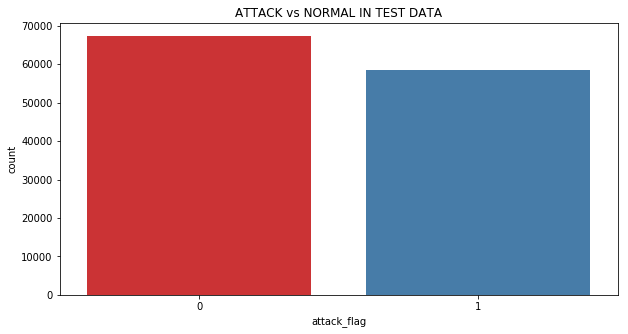

In [20]:
%matplotlib inline 

plt.figure(figsize=(10,5));
plt.title("ATTACK vs NORMAL IN TEST DATA")
sns.countplot(train.attack_flag, palette="Set1");

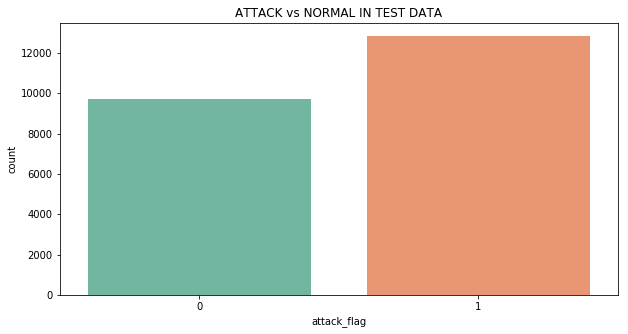

In [21]:
plt.figure(figsize=(10,5));
plt.title("ATTACK vs NORMAL IN TEST DATA")
sns.countplot(test.attack_flag, palette="Set2");

In [22]:
# Attack Class Distribution
attack_class_freq_train = train[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_test = test[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_train['frequency_percent_train'] = round((100 * attack_class_freq_train / attack_class_freq_train.sum()),2)
attack_class_freq_test['frequency_percent_test'] = round((100 * attack_class_freq_test / attack_class_freq_test.sum()),2)

attack_class_dist = pd.concat([attack_class_freq_train,attack_class_freq_test], axis=1) 
attack_class_dist

,attack_class,frequency_percent_train,attack_class,frequency_percent_test
0,45927,36.46,7167,31.79
1,67343,53.46,10004,44.38
2,11656,9.25,2421,10.74
3,995,0.79,2885,12.80
4,52,0.04,67,0.30


<Figure size 720x360 with 0 Axes>

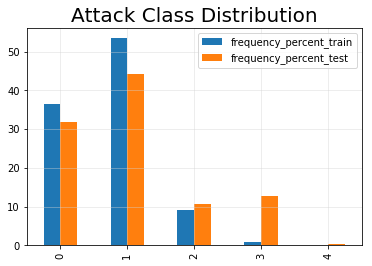

In [23]:
# Attack class bar plot
plt.figure(figsize=(10,5));
plot = attack_class_dist[['frequency_percent_train', 'frequency_percent_test']].plot(kind="bar");
plot.set_title("Attack Class Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);

### `SCALING NUMERIC FEATURES`

In [24]:
from sklearn.preprocessing import StandardScaler

nmask = train.select_dtypes(['float64', 'int64']).columns.values 

if len(nmask) > 0:
    sc = StandardScaler()

    # Scaling numeric features
    train_norm = sc.fit_transform(train[nmask])
    train[nmask] = train_norm

    # Scaling test data
    test_norm = sc.transform(test[nmask])
    test[nmask] = test_norm

### `DATA SAMPLING`

In [25]:
# Object to over-sample the minority class(es) by picking samples at random with replacement.
from imblearn.over_sampling import RandomOverSampler

# A counter is a container that stores elements as dictionary keys, and their counts are stored as dictionary values.
from collections import Counter

In [26]:
# define columns and extract encoded train set for sampling 
xtrain_sample = train.drop(['attack_flag', 'attack_class'], axis=1).values
xtest_sample = test.drop(['attack_flag', 'attack_class'], axis=1).values

ytrain_sample = train.attack_class.values
ytest_sample = test.attack_class.values

In [27]:
# apply the random over-sampling (only train set)
ros = RandomOverSampler(random_state=11)
X_res, y_res = ros.fit_sample(xtrain_sample, ytrain_sample)
print('Original dataset shape {}'.format(Counter(ytrain_sample)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 67343, 0: 45927, 2: 11656, 3: 995, 4: 52})
Resampled dataset shape Counter({1: 67343, 0: 67343, 3: 67343, 2: 67343, 4: 67343})


### `FEATURE SELECTION`

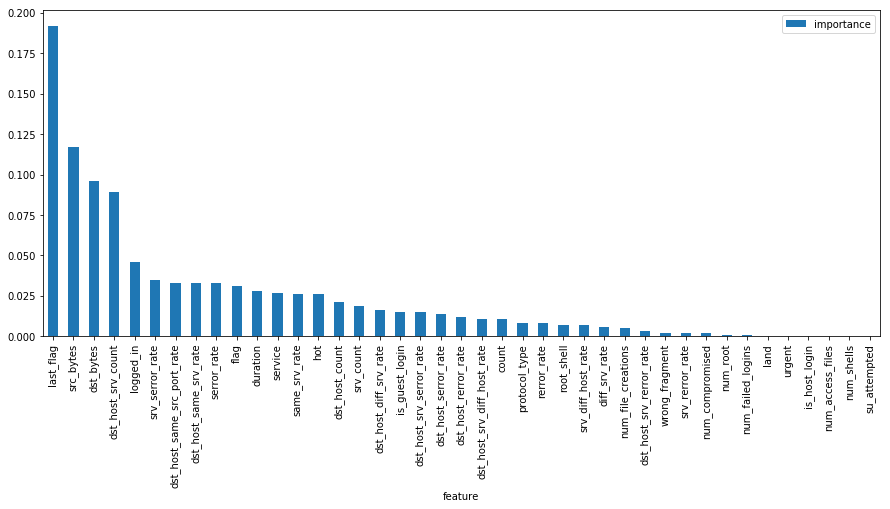

In [28]:
from sklearn.ensemble import RandomForestClassifier

samplecols = train.drop(['attack_flag', 'attack_class'], axis=1).columns.values

rfc = RandomForestClassifier(random_state=11, criterion='entropy');

# fit random forest classifier on the training set
rfc.fit(X_res, y_res);

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':samplecols ,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances = importances

# plot importances
plt.rcParams['figure.figsize'] = (15, 6)
importances.plot.bar();

#### `METHODE 2`

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools

samplecols = train.drop(['attack_flag', 'attack_class'], axis=1).columns.values
rfc = RandomForestClassifier(random_state=11)

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_res, y_res)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), samplecols)]
selected_features = [v for i, v in feature_map if i==True]
selected_features

['service',
 'src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_serror_rate',
 'last_flag']

### `RESAMPLED DF WITH IMPORTANT FEATURES`

In [30]:
# df with resmapled data and selected features
res_df = pd.DataFrame(columns = samplecols, data= X_res)
res_df = res_df[selected_features]
res_df['attack_class'] = y_res
res_df.head()

,service,src_bytes,dst_bytes,logged_in,count,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_serror_rate,last_flag,attack_class
0,20.0,-0.007679,-0.004919,-0.809262,-0.717045,-0.324063,-0.818890,-0.280282,-0.639532,0.216426,1
1,44.0,-0.007737,-0.004919,-0.809262,-0.620982,0.734343,-1.035688,2.736852,-0.639532,-1.965556,1
2,49.0,-0.007762,-0.004919,-0.809262,0.339648,0.734343,-0.809857,-0.174417,1.608759,-0.219970,0
3,24.0,-0.007723,-0.002891,1.235694,-0.690846,-1.533670,1.258754,-0.439078,-0.572083,0.652823,1
4,24.0,-0.007728,-0.004814,1.235694,-0.472521,0.734343,1.258754,-0.439078,-0.639532,0.652823,1


In [31]:
# Updating test data with important features
test_imp = test[selected_features]
test_imp['attack_class'] = test.attack_class

### `DUMMY FEATURE`

In [32]:
# Any categorical features in important features?
for x in cat_features:
    if x in selected_features:
        print(x)

service


In [33]:
res_df['service'] = res_df.service.astype('int64')
res_df['service'] = res_df.service.astype('object')

test_imp['service'] = test_imp.service.astype('int')
test_imp['service'] = test_imp.service.astype('object')

In [34]:
print('Unique values in train data:', len(res_df.service.unique()))
print('Unique values in train data:', len(test_imp.service.unique()))

Unique values in train data: 70
Unique values in train data: 64


In [35]:
res_df = pd.get_dummies(res_df, drop_first=True, columns=['service'])
test_imp =  pd.get_dummies(test_imp, drop_first=True, columns=['service'])

In [36]:
train_col = res_df.columns.values
test_col = test_imp.columns.values

In [37]:
delcol = list()
for x in train_col:
    if x not in test_col:
        delcol.append(x)
        
delcol

['service_3',
 'service_22',
 'service_25',
 'service_27',
 'service_50',
 'service_64']

In [38]:
# Drop extra columns
res_df.drop(delcol, axis=1, inplace=True)

### `DATASET PARTITION`

In [39]:
# Attack classes in encoder 
class_en.classes_

array(['dos', 'normal', 'probe', 'r2l', 'u2r'], dtype=object)

#### `NORMAL (1) AND DOS (0)`

In [40]:
dos_df = res_df[(res_df.attack_class == 0) | (res_df.attack_class == 1)]
print('Train(DOS):', dos_df.shape)

dos_test_df = test_imp[(test_imp.attack_class == 0) | (test_imp.attack_class == 1)]
print('Test(DOS):', dos_test_df.shape)

Train(DOS): (134686, 73)
Test(DOS): (17171, 73)


#### `NORMAL (1) AND PROBE (2)`

In [41]:
probe_df = res_df[(res_df.attack_class == 2) | (res_df.attack_class == 1)]
print('Train(PROBE):', probe_df.shape)

probe_test_df = test_imp[(test_imp.attack_class == 2) | (test_imp.attack_class == 1)]
print('Test(PROBE):', probe_test_df.shape)

Train(PROBE): (134686, 73)
Test(PROBE): (12425, 73)


#### `NORMAL (1) AND R2L (3)`

In [42]:
r2l_df = res_df[(res_df.attack_class == 3) | (res_df.attack_class == 1)]
print('Train(R2L)', r2l_df.shape)

r2l_test_df = test_imp[(test_imp.attack_class == 3) | (test_imp.attack_class == 1)]
print('Test(R2L):', r2l_test_df.shape)

Train(R2L) (134686, 73)
Test(R2L): (12889, 73)


#### `NORMAL (1) AND U2R (4)`

In [43]:
u2r_df = res_df[(res_df.attack_class == 4) | (res_df.attack_class == 1)]
print('Train(U2R)', u2r_df.shape)

u2r_test_df = test_imp[(test_imp.attack_class == 4) | (test_imp.attack_class == 1)]
print('Test(U2R):', u2r_test_df.shape)

Train(U2R) (134686, 73)
Test(U2R): (10071, 73)


### `TRAIN TEST SPLIT`

In [51]:
from sklearn.model_selection import train_test_split

# Data for binary classification
# X = dos_df.drop('attack_class', axis=1)
# y = dos_df.attack_class

X = res_df.drop('attack_class', axis=1)
y = res_df.attack_class

# Train Test split for Binary Classfication
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11, stratify=y)

##  `ALGORITHMS FOR BINARY CLASSIFICATION`

********************** Results **********************
DecisionTreeClassifier
Recall: 99.9748%
Precision: 99.9748%
Time taken by DecisionTreeClassifier Classifier: 0:00:02.519938
RandomForestClassifier
Recall: 99.9807%
Precision: 99.9807%
Time taken by RandomForestClassifier Classifier: 0:00:12.515859
AdaBoostClassifier
Recall: 82.0278%
Precision: 83.2222%
Time taken by AdaBoostClassifier Classifier: 0:00:33.388085
LogisticRegression
Recall: 92.1373%
Precision: 93.0225%
Time taken by LogisticRegression Classifier: 0:00:53.964455


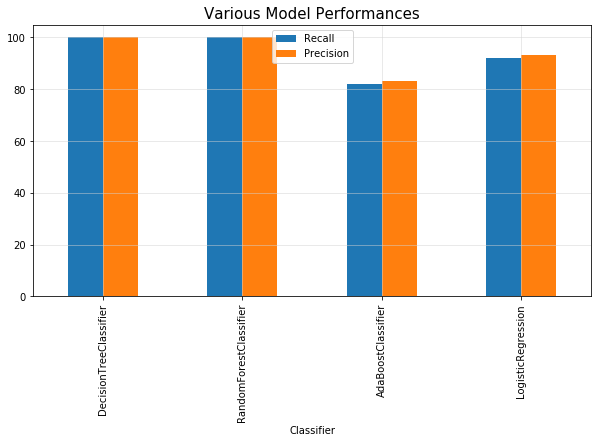

In [54]:
from sklearn.metrics import accuracy_score, log_loss, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import datetime

classifiers = [DecisionTreeClassifier(max_features = 0.7, random_state=11),
               RandomForestClassifier(max_features = 0.7, random_state=11, criterion='entropy'),
               AdaBoostClassifier(random_state=11),
#                GradientBoostingClassifier(max_features = 0.7, random_state=11),
#                XGBClassifier(max_features = 0.7, random_state=11),
#                KNeighborsClassifier(n_neighbors=2, weights='distance'),
               LogisticRegression(class_weight='balanced', random_state=11)]

# Logging for Visual Comparison
log_cols=["Classifier", "Recall", "Precision"]
log = pd.DataFrame(columns=log_cols)

print('********************** Results **********************')
for clf in classifiers:
    # logging start time
    start = datetime.datetime.now()
    
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("="*70)
    print(name)
    
    train_predictions = clf.predict(x_test)
    recall = recall_score(y_test, train_predictions, average='weighted')
    pre = precision_score(y_test, train_predictions, average='weighted')
    print("Recall: {:.4%}".format(recall))
    print("Precision: {:.4%}".format(pre))
    
    end = datetime.datetime.now()
    
    print(f'Time taken by {name} Classifier: {end-start}')
    
    # Appending to the dataframe
    log_entry = pd.DataFrame([[name, recall*100, pre*100]], columns=log_cols)
    log = log.append(log_entry)
    
    
print("="*70)

# Various models performance plot
log.set_index('Classifier', inplace=True)

plt.rcParams['figure.figsize'] = (10, 5)
plot = log[['Recall', 'Precision']].plot(kind="bar");
plot.set_title("Various Model Performances", fontsize=15);
plot.grid(color='lightgray', alpha=0.6);

### `MODEL EVALUATION`

************************************************************

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13469
           1       1.00      1.00      1.00     13469
           2       1.00      1.00      1.00     13468
           3       1.00      1.00      1.00     13469
           4       1.00      1.00      1.00     13468

   micro avg       1.00      1.00      1.00     67343
   macro avg       1.00      1.00      1.00     67343
weighted avg       1.00      1.00      1.00     67343

************************************************************



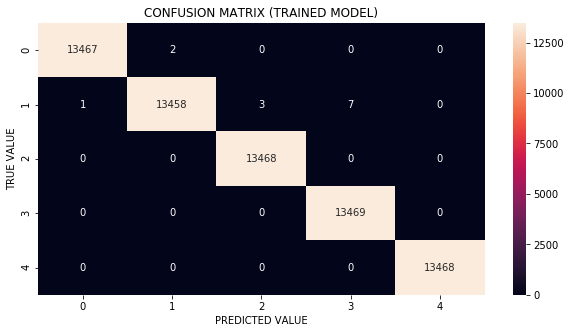

In [55]:
from sklearn.ensemble import VotingClassifier

rf = RandomForestClassifier(max_features = 0.7, random_state=11, criterion='entropy')

#  Train Ensemble Model (This method combines all the individual models above except RandomForest)
combined_model = [('Random', rf)]

v =  VotingClassifier(estimators = combined_model, voting = 'soft')

v.fit(x_train, y_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('*'*60)
print()
print(classification_report(y_test, v.predict(x_test)))
print('*'*60)

print()

cm = confusion_matrix(y_test, v.predict(x_test))

# Plotting confusion matrix
plt.title('CONFUSION MATRIX (TRAINED MODEL)')
sns.heatmap(cm, annot=True, fmt='g');
plt.xlabel('PREDICTED VALUE');
plt.ylabel('TRUE VALUE');

## `MAKING PREDICTIONS ON TEST DATASET`

************************************************************

--------------- CLASSIFICATION REPORT ---------------

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7167
           1       0.72      0.97      0.83     10004
           2       0.67      0.62      0.64      2421
           3       0.78      0.10      0.17      2885
           4       0.45      0.27      0.34        67

   micro avg       0.78      0.78      0.78     22544
   macro avg       0.71      0.56      0.57     22544
weighted avg       0.79      0.78      0.74     22544

************************************************************


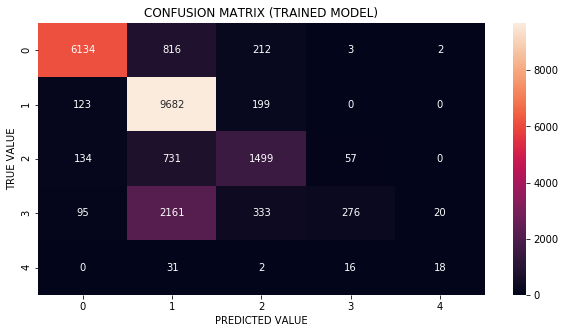

In [56]:
# X_test = dos_test_df.drop('attack_class', axis=1)
# Y_test = dos_test_df.attack_class

X_test = test_imp.drop('attack_class', axis=1)
Y_test = test_imp.attack_class

print('*'*60)
print()
print('--------------- CLASSIFICATION REPORT ---------------')
print()
print(classification_report(Y_test, v.predict(X_test)))
print('*'*60)

cmt = confusion_matrix(Y_test, v.predict(X_test))

# Plotting confusion matrix
plt.title('CONFUSION MATRIX (TRAINED MODEL)')
sns.heatmap(cmt, annot=True, fmt='g');
plt.xlabel('PREDICTED VALUE');
plt.ylabel('TRUE VALUE');

In [48]:
script_end_time = datetime.datetime.now()
print('Script Execution Time: ', (script_end_time - script_start_time))

Script Execution Time:  0:05:23.608320
